In [134]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve,classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import imblearn

In [135]:
train_df = pd.read_csv('training_df.csv')

In [136]:
train_df.columns

Index(['Unnamed: 0', 'best_match_score', 'genre', 'is_presale', 'max_tickets',
       'num_markets', 'sold_out', 'subgenre', 'venue_name_left',
       'popularity_left', 'headliner', 'support', 'metro_area', 'short_title',
       'average_price', 'median_price', 'lowest_price', 'venue_name',
       'venue_popularity', 'general_admission', 'popularity_right', 'score'],
      dtype='object')

In [137]:
train_df = train_df[['is_presale', 'max_tickets','num_markets', 'sold_out',
                     'venue_popularity', 'general_admission', 'popularity_right']]

In [138]:
train_df = pd.get_dummies(train_df)

In [139]:
X = train_df.drop(columns= ['sold_out'])
y = train_df['sold_out']

In [140]:
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [141]:
baseline = DummyClassifier()
baseline.fit(x_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [142]:
y_pred = baseline.predict(x_test)
accuracy_score(y_test,y_pred)

0.8521978021978022

In [143]:
confusion_matrix(y_test,y_pred)

array([[1542,  143],
       [ 126,    9]])

In [144]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [145]:
pred = tree_clf.predict(x_test)

In [ ]:
√

In [146]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 92.58%


In [147]:
confusion_matrix(y_test, pred)

array([[1683,    2],
       [ 133,    2]])

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

/Users/matt/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
pred = reg.predict(x_test)

In [151]:
accuracy_score(y_test,pred)

0.9258241758241759

In [152]:
residuals = np.abs(y_test - pred)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    1685
1.0     135
Name: sold_out, dtype: int64
0.0    0.925824
1.0    0.074176
Name: sold_out, dtype: float64


In [153]:
y_hat_test = reg.predict(x_test)
y_hat_train = reg.predict(x_train)

In [154]:
residuals = y_train - y_hat_train
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    4970
1.0     488
Name: sold_out, dtype: int64
0.0    0.91059
1.0    0.08941
Name: sold_out, dtype: float64


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [156]:
rf = RandomForestClassifier(n_estimators= 200, max_features= 'auto', max_depth = 12)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
pred = rf.predict(x_test)

print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 92.14%


In [158]:
confusion_matrix(y_test, pred)

array([[1673,   12],
       [ 131,    4]])

In [159]:
def plot_feature_importances(x_train,model):
    import matplotlib.pyplot as plt
    import numpy as np
    importances = model.feature_importances_
    n_features = x_train.shape[1]
    plt.figure(figsize=(8,15))
    plt.barh(range(n_features), importances, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

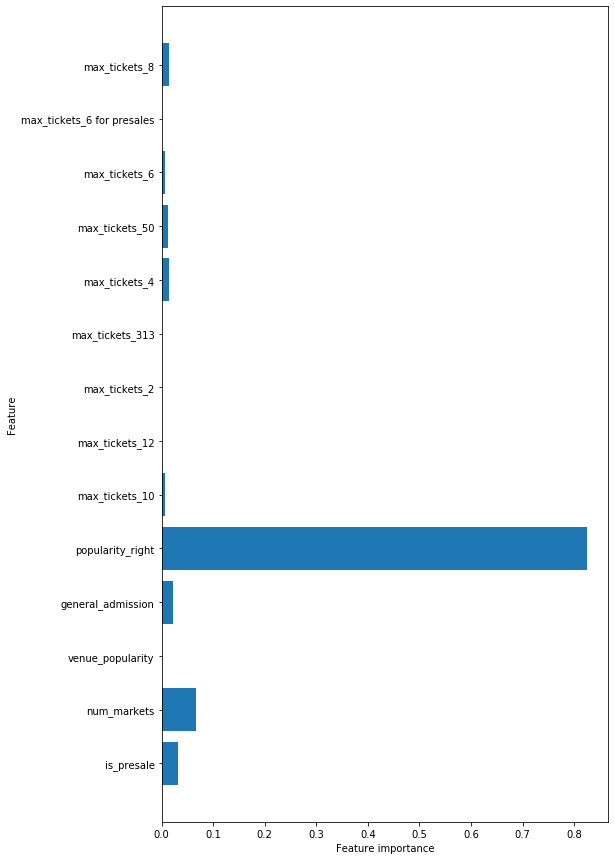

In [131]:
plot_feature_importances(x_train,rf)

In [39]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))
tpot.export('concert_pipeline.py')



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.55, min_samples_leaf=3, min_samples_split=13, n_estimators=100)
0.9274725274725275


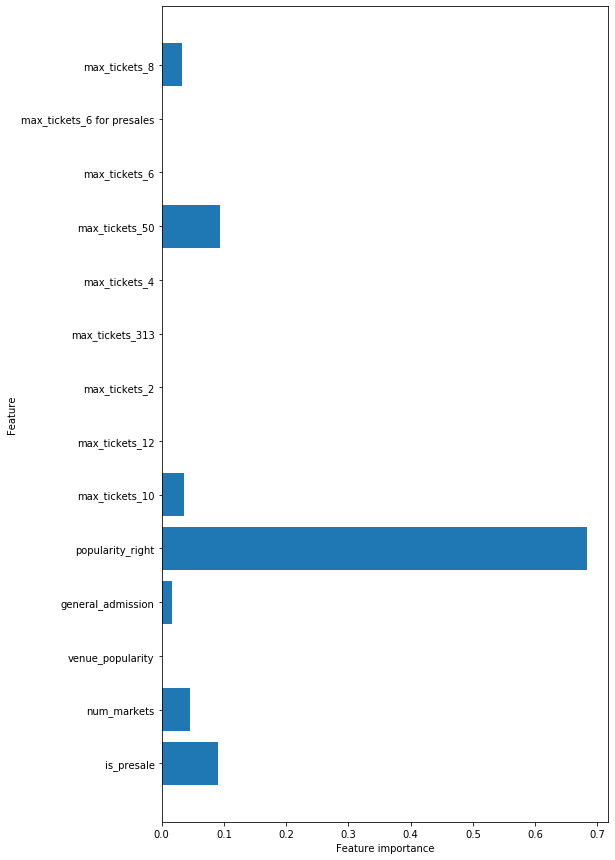

In [160]:
plot_feature_importances(x_train,tree_clf)

In [161]:
train_df.columns

Index(['is_presale', 'num_markets', 'sold_out', 'venue_popularity',
       'general_admission', 'popularity_right', 'max_tickets_10',
       'max_tickets_12', 'max_tickets_2', 'max_tickets_313', 'max_tickets_4',
       'max_tickets_50', 'max_tickets_6', 'max_tickets_6 for presales',
       'max_tickets_8'],
      dtype='object')